# Sample Assessment Geo Data Science

## Abstract

Over the last years, remote sensing has developed satellite sensors to collect high spatial and temporal resolution images from Earth's surface generating large data and new opportunities for developing methods to access and analyse this data, as Earth observation data cubes. With data cubes it is possible to analyse the Earth's surface over temporal and spatial attributes and allows the extraction of Land Use and Land Cover (LULC) features and patterns to map land use changes. This also provides an extensive mass of historical data about phenology and years of image time series [[1]](./README.md#References). Soon, this historical data can be useful for training deep learning algorithms based on temporal and spatial dimensions. The paper [[1]](./README.md#References) demonstrated how this historical data can be used to generate LULC samples using Time-Weighted Dynamic Time Warping (TWDTW). As demonstrated in [[2]](./README.md#References) the current ways to classify land use and land cover maps like Random Forest and Support Vector Machines (SVM) algorithms have been successfully applied to the LULC change classification. However these algorithms do not use the temporal dimension, an important characteristic in data cubes, in the classification process, resulting in lost data. In other words, the order of the images does not influence the results. The approach presented by the paper [[2]](./README.md#References) proposed a comprehensive study of Temporal Convolutional Neural Networks (TempCNNs), an in-depth approach that applies convolutions in the temporal dimension to automatically learn temporal and spectral features. The study presented by [[3]](./README.md#References) demonstrates the good quality of TempCNN to accurately map LULC without over-representation of majority classes using TempCNN. This approach aims to present a study about remote sensing time series features extraction using TempCNN to LULC classification to estimate the probability of LULC class based on deep learning algorithms in order to contribute to LULC sample generation over the Brazilian Biomes territory. This approach will use the Brazil Data Cube infrastructure to collect data and analyse them. To estimate the probability of LULC classes, this study will use an active learning method, a stored model that will predict the class of unlabeled data based on labeled data and stored, as an oracle. This study also seeks to demonstrate a comparison between the temporal based Neural Networks as TempCNN, non-temporal based like CNN and the current methods as the Random Forest and SVM Algorithm.

In [46]:
source("./R/utils.R")

In [106]:
url <- ""
format_to_sits <- function() {
    data <- GET(url, encode = "raw")
    id <- c()
    label <- c()
    start_date <- c()
    end_date <- c()
    longitude <- c()
    latitude <- c()
    for(item in content(data)) {
        if (item$location$type == 'Point') {
            id <- append(id, item$id)
            label <- append(label, item$class_name)
            start_date <- append(
                start_date,
                as.Date(
                    item$start_date,
                    format = "%Y-%m-%dT00:00:00Z"
                )       
            )
            end_date <- append(
                end_date,
                as.Date(
                    item$end_date,
                    format = "%Y-%m-%dT00:00:00Z"
                )
            )
            longitude <- append(
                longitude,
                item$location$coordinates[[1]]
            )
            latitude <- append(
                latitude,
                item$location$coordinates[[2]]
            )
        }
    }

    samples <- as_tibble(list(
        label = label,
        start_date = start_date,
        end_date = end_date,
        longitude = longitude,
        latitude = latitude
    ))
    class(samples) <- c("sits", class(samples))
    return(samples)
}

In [107]:
samples <- format_to_sits()
samples

label,start_date,end_date,longitude,latitude
<chr>,<date>,<date>,<dbl>,<dbl>
Desflorestamento,2020-01-01,2020-12-31,-49.16931,-13.07413
Desflorestamento,2020-10-01,2020-11-30,-49.08069,-12.38322
Desflorestamento,2020-01-01,2020-12-31,-49.08142,-12.39634
Floresta,2020-01-01,2020-12-31,-48.86169,-12.84929
Floresta,2020-10-01,2020-11-30,-49.07228,-12.38842
Floresta,2020-10-01,2020-11-30,-49.35883,-12.53848
Hidrografia,2020-01-01,2020-12-31,-49.52637,-12.83323
Hidrografia,2020-01-01,2020-12-31,-49.47470,-12.78217
Não Floresta,2020-01-01,2020-12-31,-49.63898,-12.33464


In [96]:
samples_sits <- read_file.tb("./data/samples/samples_amazonia.rda", "rda")
samples_sits[2, ]

longitude,latitude,start_date,end_date,label,cube,time_series
<dbl>,<dbl>,<date>,<date>,<chr>,<chr>,<list>
-64.62979,-9.996668,2018-07-28,2019-07-28,Deforestation,sentinel-077095,"17740.0000, 17756.0000, 17772.0000, 17788.0000, 17804.0000, 17820.0000, 17836.0000, 17852.0000, 17868.0000, 17884.0000, 17897.0000, 17913.0000, 17929.0000, 17945.0000, 17961.0000, 17977.0000, 17993.0000, 18009.0000, 18025.0000, 18041.0000, 18057.0000, 18073.0000, 18089.0000, 18105.0000, 0.0166, 0.0369, 0.0541, 0.0579, 0.0567, 0.0523, 0.0478, 0.0433, 0.0388, 0.0408, 0.0428, 0.0448, 0.0411, 0.0374, 0.0336, 0.0345, 0.0354, 0.0363, 0.0372, 0.0326, 0.0374, 0.0390, 0.0392, 0.0443, 0.0181, 0.0503, 0.0829, 0.0761, 0.0757, 0.0720, 0.0682, 0.0645, 0.0607, 0.0662, 0.0718, 0.0774, 0.0717, 0.0659, 0.0601, 0.0570, 0.0538, 0.0506, 0.0474, 0.0381, 0.0574, 0.0579, 0.0613, 0.0715, 0.1839, 0.2450, 0.2322, 0.1270, 0.1146, 0.1177, 0.1208, 0.1239, 0.1271, 0.1368, 0.1466, 0.1564, 0.1734, 0.1904, 0.2074, 0.2413, 0.2753, 0.3093, 0.3433, 0.3423, 0.2739, 0.2699, 0.2564, 0.2501, 0.4781, 0.4419, 0.3427, 0.1467, 0.1399, 0.1520, 0.1641, 0.1762, 0.1883, 0.1917, 0.1951, 0.1985, 0.2499, 0.3014, 0.3529, 0.4195, 0.4861, 0.5527, 0.6194, 0.6430, 0.4670, 0.4727, 0.4381, 0.4010, 0.8674, 0.6965, 0.5295, 0.3103, 0.3019, 0.3344, 0.3670, 0.3995, 0.4321, 0.4220, 0.4119, 0.4018, 0.4729, 0.5440, 0.6151, 0.6576, 0.7002, 0.7427, 0.7853, 0.8228, 0.6917, 0.6914, 0.6630, 0.6095"


In [109]:
data <- GET(url, encode = "raw")

In [115]:
content(data)[[1]]$location$type

[1] "Point"

In [119]:
x_coord <- c(-64.6370515,  -64.4729128,  -64.3808852, -64.3664629, -64.4962630, -64.6157616, -64.6377383)
y_coord <- c(-10.2985706, -10.1978927, -10.2424922, -10.3418050, -10.4208274, -10.4025932, -10.2978950)
xym <- cbind(x_coord, y_coord)
xym

x_coord,y_coord
-64.63705,-10.29857
-64.47291,-10.19789
-64.38089,-10.24249
-64.36646,-10.34181
-64.49626,-10.42083
-64.61576,-10.40259
-64.63774,-10.29790


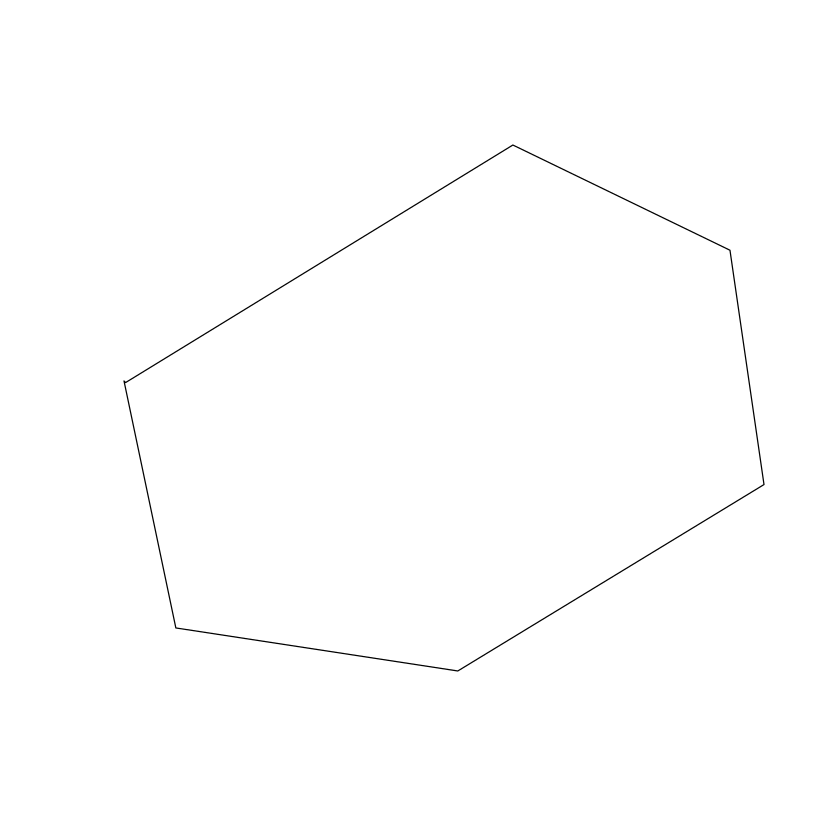

In [120]:
library(sp)
p = Polygon(xym)
ps = Polygons(list(p),1)
sps = SpatialPolygons(list(ps))
plot(sps)